<a href="https://colab.research.google.com/github/badlogic/genai-workshop/blob/main/02_unsupervised_learning_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning
In unsupervised learning, the goal is to identify patterns or structures in data without the guidance of explicit output labels. The unsupervised machine learning model tries to learn the underlying structure from the data itself. The patterns and structures are then exposed for use by downstream tasks.

Data can be grouped based on similarity, spatial closeness, or differences, a process known as **clustering**. For example, customer data can be clustered to identify distinct groups based on purchasing behavior without predefined categories.

Another task is **dimensionality reduction**, where the algorithm reduces the number of variables under consideration, extracting the most important features. This can help visualize complex data sets or improve the efficiency of other learning tasks. Outputs from models for this task can also be viewed as **embeddings** into a **latent space**, where similar items are close to each other. In the best case, areas within the latent space represent do semantic features of the input data. E.g. when embedding an image of a face, one such latent area could be the face orientation, or its skin tone, and so on. Such embeddings are often used as the input to other machine learning models, as they capture the essence and semantics of the original input data in a mathematical form. They can also be directly used for applications like semantic search engines, or recommender systems.

**Language modeling** is another significant area within unsupervised learning. It involves training models on large corpora of text to predict the probability of word sequences. By doing so, language models learn the linguistic patterns, syntax, and semantics of a language without explicit instructions, enabling them to generate coherent text or fill in missing words. This capability is foundational for many NLP applications, including embeddings, text generation, translation, and sentiment analysis.

## Data
Just as in supervised learning, we need to perform preprocessing and feature engineering on any data we feed into an unsupervised model. However, we do not have a need for labels and can skip the labelling step.

## Models
As for supervised learning, there are many available models for unsupervised learning.

### Clustering
For clustering, popular models include:
- [K-means clustering](https://en.wikipedia.org/wiki/K-means_clustering), which partitions data into k distinct clusters based on distance to the centroid of each cluster.
- [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN), which groups together closely packed points and marks points that are in low-density regions as outliers.
- [Hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering), which builds a tree of clusters by repeatedly merging or splitting existing clusters.

[scikit-learn](https://scikit-learn.org/0.15/modules/classes.html#module-sklearn.cluster) offers implementations for many popular clustering models.

### Dimensionality reduction & embeddings
For dimensionality reduction, common models are:
- [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis), which reduces the dimensionality of data by transforming it to a new set of variables that are uncorrelated and order by the amount of variance each new variable captures.
- [t-Distributed Stochastic Neighbor Embedding (t-SNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), which is particularly well suited for the visualization of high-dimensional datasets.
- [UMAP](https://pair-code.github.io/understanding-umap/), another model well suited for visualizuation of high-dimensional datasets.
- [Autoencoders](https://en.wikipedia.org/wiki/Autoencoder), a type of neural network model used to learn efficient codings of unlabeled data.
- [Sentence-BERT](https://arxiv.org/abs/1908.10084), a [transformer](https://en.wikipedia.org/wiki/Transformer_(deep_learning_architecture) based model architecture to embed text (and more recently images).

UMAP is available as a simple to use [Python module](https://github.com/lmcinnes/umap). Sentence-BERT is also available as a [Python framework](https://www.sbert.net/examples/applications/semantic-search/README.html).

### Language models

For language modelling, notable models are:
- [(Word) n-gram models](https://en.wikipedia.org/wiki/Word_n-gram_language_model): a purely statistical model, that gathers frequencies for sequences of words (or characters) and derrives probabilities from them.
- [BERT (Bidirectional Encoder Representations from Transformers)](https://en.wikipedia.org/wiki/BERT_(language_model), which utilizes an [encoder-only transformer](https://en.wikipedia.org/wiki/Transformer_(deep_learning_architecture) model) architecture to understand the context of words in a sentence by looking at the words that come before and after it.
- [GPT (Generative Pre-trained Transformer)](https://en.wikipedia.org/wiki/Generative_pre-trained_transformer) is a series of language models (GPT, GPT-2, GPT-3, etc.) that use a decoder-only transformer model architecture to understand the context of words in a sentence by looking at the words that come before it.
- [LlaMA](https://en.wikipedia.org/wiki/LLaMA) is another series of language models (LlaMA, LlaMA-2, Code LlaMA) using a decoder-only transformer model architecture. These models are notable because they are open-source, as opposed to later models in the GPT series.

Most of these models are available on [Hugging Face](https://huggingface.co/), including pre-trained **foundational models** which can be adapted to downstream tasks, like classification, code completion, chat-like question answering, and many more tasks via **fine tuning**, a form of **transfer learning**. They form the basis for **generative models** employed in applications like OpenAI's [ChatGPT](https://chat.openai.com/), or [GitHub Copilot](https://github.com/features/copilot).

## Training
For an unsupervised machine learning model to identify patterns or structures within unlabeled data, it applies algorithms that discover inherent groupings, correlations, or low-dimensional representations of the data. Unlike supervised learning, unsupervised learning does not rely on labeled outputs. Therefore, the "training" process involves adjusting the model's parameters to better capture the statistical properties of the dataset. This is often done via some objective from which a loss can be calculated, which then serves to adjust the parameters. This is similar to supervised training.

Let's have a look at the training of some of the models mentioned above.

### Clustering - K-Means
In K-Means, the training objective is to minimize the sum of squared distances between each point and the centroid of the cluster to which it is assigned. The centroid of a cluster is the mean position of all points assigned to the cluster.

This training process begins by randomly initializing cluster centroids, then iteratively performs two steps until convergence: assignment of each point to the nearest cluster centroid, and updating the centroid of each cluster to be the mean of the points assigned to it. The algorithm converges when the assignments no longer change, indicating that the positions of the centroids have stabilized and the clusters are as compact as possible given the initial conditions.

K-Means only hyper-parameter is the number of clusters it should generate. This is usually none trivial, even for domain experts who know the data well. Another issue is that K-Means can only succesfully cluster data, where the clusters have a blob like shape and are separated well.

### Dimensionality Reduction - UMAP
UMAP's objective in dimensionality reduction is to preserve as closely as possible the data's original global and local structure in a lower-dimensional space. It does this by minimizing the difference between the distances among points in the high-dimensional space and their distances in the reduced space, effectively maintaining the data's inherent geometric and topological properties.

The training process starts with the construction of a high-dimensional graph where points are connected to their nearest neighbors, reflecting local data structures. Then, UMAP optimizes for a similar, lower-dimensional graph by adjusting positions to mirror these local relationships, guided by attractive forces for neighbors and repulsive forces for non-neighbors. Convergence is reached when the layout of points in the low-dimensional space stabilizes, meaning the representation closely aligns with the high-dimensional relationships while adhering to the set hyperparameters, such as the number of neighbors and minimum distance between points.

UMAP's hyperparameters include the number of neighbors (which influences how UMAP balances local versus global structure in the data), the minimum distance between points in the low-dimensional space (controlling how tightly UMAP is allowed to pack points together), and the number of components (the dimensionality of the target space).

One of UMAP's strengths is its flexibility in handling various types of data and its ability to preserve more of the global data structure compared to other techniques like t-SNE. However, choosing the right hyperparameters can be crucial for achieving meaningful dimensionality reduction results.

### Language Modelling - BERT, GPT, LlaMA
BERT, GPT, and LlaMA all use **self-supervised learning** during training, which is a subcategory of unsupervised learning. In self-supervised learning, training does not rely on external labels but instead uses the input data itself to generate the labels.

BERT employs a training objective known as masked language modeling (MLM). In MLM, some percentage of the input tokens are randomly masked, and the model's task is to predict the original identity of these masked tokens, using the context provided by the non-masked tokens. This allows BERT to learn a deep, bidirectional representation of the text. Convergence is typically determined by a plateau in improvement on the MLM task across the training dataset, indicating that the model has effectively learned to predict the masked tokens from their context.

A trained BERT model can then be used for downstream tasks such as [extractive question answering](https://huggingface.co/learn/nlp-course/en/chapter7/7), or [named entity recongition](https://en.wikipedia.org/wiki/Named-entity_recognition). In both downstream tasks, the text to the left and right of a question answering sentence or named entity are important.

GPT and LlaMA use a different approach, known as *autoregressive* language modeling. Autoregressive language modeling is a process where the prediction of the next word or token in a sequence is based on the words or tokens that precede it. This means that the model generates text one token at a time, using its own previous outputs as context for the next prediction. This approach allows models like GPT and LlaMA to generate coherent and contextually relevant sequences of text, by effectively capturing the structure and dynamics of language. Convergence in this context is reached when the model minimizes the perplexity of the text, a measure of how well it predicts a sample, or when improvements on the validation set plateau.

Trained GPT or LlaMA model can be used for downstream tasks that involve generating text, where by definition there is no information to the right of the currently generated token to consider.

All 3 models really only become useful with additional fine-tuning on top of pre-trained model parameters.


## Playing with K-Means
K-Means is one of the oldest and most popular clustering algorithms. This is largely due to its simplicity and speed. It is one of the first tools applied to new data science projects, to get a better idea of what structure some unlabeled data might posess.

We are going to play with K-Means quickly to get a feeling for clustering in general.

We'll use the [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) implementation by scikit-learn.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

First we generate a synthetic dataset of 3 clusters, each consisting of 100 two dimensional samples, and plot the data.

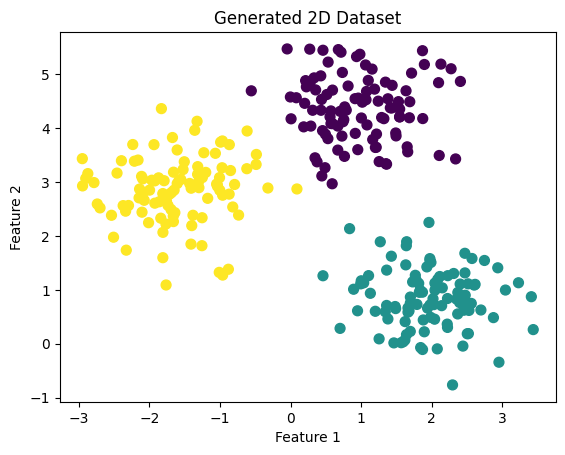

In [2]:
# Generate a 2D dataset with 3 centers (clusters)
samples, labels = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Plot the generated dataset
plt.scatter(samples[:, 0], samples[:, 1], c=labels, s=50, cmap="viridis")
plt.title('Generated 2D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Next, we "fit" a K-Means instance to the data. Consider this the training of the model, wherein it tries to find the structure (in this case clusters of samples) in the data.

We specify the only hyper parameter of K-Means model called `k`, the number of clusters we expect.



In [26]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, n_init="auto")
kmeans.fit(samples)
kmeans.cluster_centers_

array([[ 1.95159369,  0.83467497],
       [-1.60811992,  2.85881658],
       [ 0.95625704,  4.37226546]])

The K-Means training resulted in 3 cluster centroids.

Next, we can assign each sample to a cluster, by picking the cluster who's centroid is the closest to the sample.

In [27]:
cluster_labels = kmeans.predict(samples)
cluster_labels

array([2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2,
       0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1,
       2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1,
       2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0,
       1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1], d

Finally, we can plot the clusters, and the samples with their cluster assignment indicated by a cluster specific color.

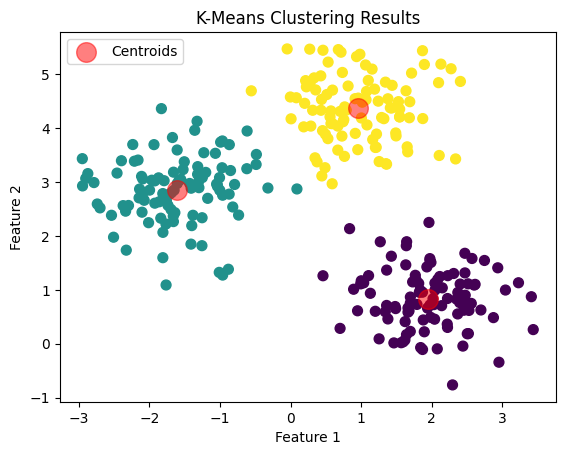

In [28]:
# Plot the clustered dataset
def visualize_clusters(cluster_centroids, samples, cluster_labels):
  plt.scatter(samples[:, 0], samples[:, 1], c=cluster_labels, s=50, cmap='viridis')
  if (len(cluster_centroids) > 0):
    plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], c='red', s=200, alpha=0.5, label='Centroids')
    plt.legend()
  plt.title('K-Means Clustering Results')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()
visualize_clusters(kmeans.cluster_centers_, samples, cluster_labels)

The K-Means model was able to identify all 3 clusters. However, often, we do not know the number of clusters in advance. We then usually try different values `k` and pick the clustering that fullfills some criteria the best, like the [Elbow method or the Silhouette method](https://builtin.com/data-science/elbow-method).

Here is what happens if we cluster the same dataset with `k` set to `2` and `10` respectively.

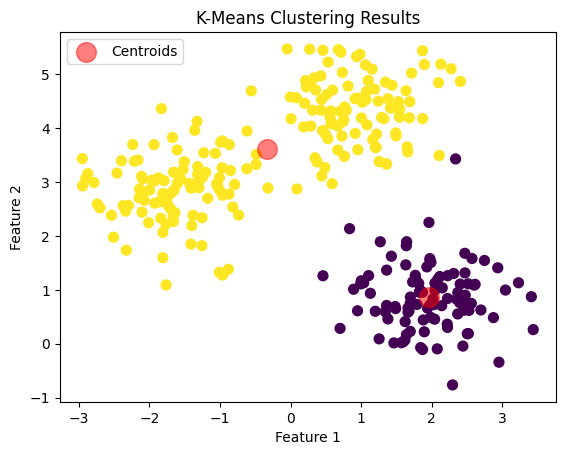

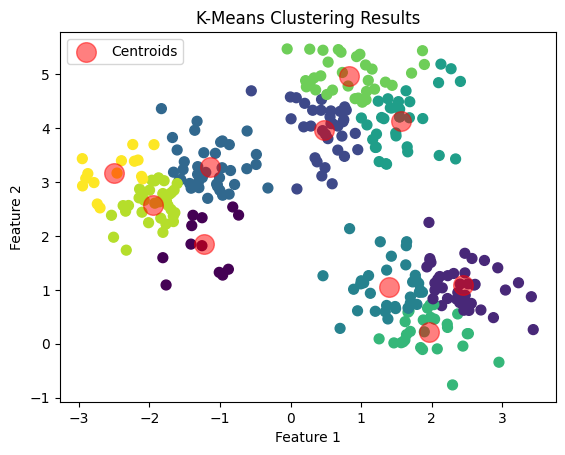

In [29]:
kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans.fit(samples)
visualize_clusters(kmeans.cluster_centers_, samples, kmeans.predict(samples))

kmeans = KMeans(n_clusters=10, n_init="auto")
kmeans.fit(samples)
visualize_clusters(kmeans.cluster_centers_, samples, kmeans.predict(samples))

Besides the choice of `k`, another issue with K-Means is that it assumes the samples of a cluster to have a spherical shape. It can not cluster data with shapes differing from this assumption. E.g.:

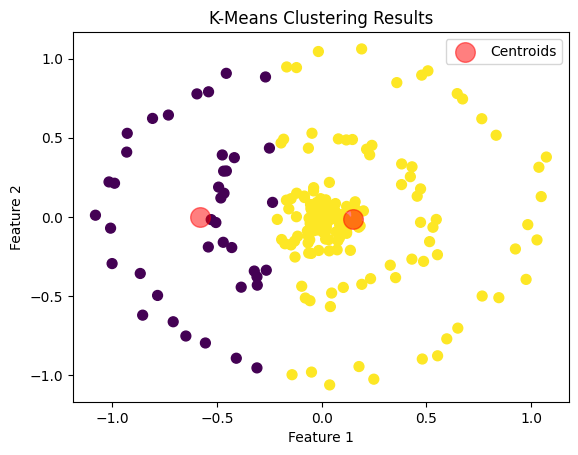

In [30]:
import numpy as np
from sklearn.datasets import make_circles
samples_ring, _ = make_circles(n_samples=100, factor=0.5, noise=0.05)
samples_blob, _ = make_blobs(n_samples=100, centers=[[0, 0]], cluster_std=0.1)
samples_combined = np.vstack((samples_ring, samples_blob))

kmeans = KMeans(2, n_init="auto")
kmeans.fit(samples_combined)
visualize_clusters(kmeans.cluster_centers_, samples_combined, kmeans.predict(samples_combined))

These kind of structures lend themselves better to be discovered by density based clustering algorithms, like DBSCAN. Note that DBSCAN does not create centroids, due to the nature it works.

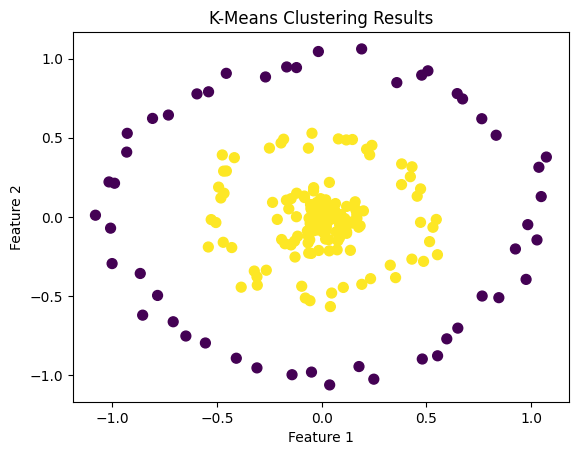

In [31]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(samples_combined)
visualize_clusters([], samples_combined, dbscan.labels_)